# Introduction

<center><img src="https://i.imgur.com/9hLRsjZ.jpg" height=400></center>

This dataset was scraped from [nextspaceflight.com](https://nextspaceflight.com/launches/past/?page=1) and includes all the space missions since the beginning of Space Race between the USA and the Soviet Union in 1957!

### Install Package with Country Codes

In [136]:
%pip install iso3166

### Upgrade Plotly

Run the cell below if you are working with Google Colab.

In [137]:
%pip install --upgrade pip
%pip install --upgrade plotly
%pip install --upgrade pandas

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


### Import Statements

In [138]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# These might be helpful:
from iso3166 import countries
from datetime import datetime, timedelta

### Notebook Presentation

In [139]:
pd.options.display.float_format = '{:,.2f}'.format

### Load the Data

In [140]:
df_data = pd.read_csv('mission_launches.csv')

# Preliminary Data Exploration

* What is the shape of `df_data`? 
* How many rows and columns does it have?
* What are the column names?
* Are there any NaN values or duplicates?

In [141]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4324 entries, 0 to 4323
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0.1    4324 non-null   int64 
 1   Unnamed: 0      4324 non-null   int64 
 2   Organisation    4324 non-null   object
 3   Location        4324 non-null   object
 4   Date            4324 non-null   object
 5   Detail          4324 non-null   object
 6   Rocket_Status   4324 non-null   object
 7   Price           964 non-null    object
 8   Mission_Status  4324 non-null   object
dtypes: int64(2), object(7)
memory usage: 304.2+ KB


In [142]:
df_data.isna().sum()

Unnamed: 0.1         0
Unnamed: 0           0
Organisation         0
Location             0
Date                 0
Detail               0
Rocket_Status        0
Price             3360
Mission_Status       0
dtype: int64

## Data Cleaning - Check for Missing Values and Duplicates

Consider removing columns containing junk data. 

In [143]:
df_data = df_data.fillna(0)

In [144]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.0,Success
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0,Success
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.0,Success
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.0,Success


## Descriptive Statistics

In [145]:
df_data.describe()

,Unnamed: 0.1,Unnamed: 0
count,"4,324.00","4,324.00"
mean,"2,161.50","2,161.50"
std,"1,248.38","1,248.38"
min,0.00,0.00
25%,"1,080.75","1,080.75"
50%,"2,161.50","2,161.50"
75%,"3,242.25","3,242.25"
max,"4,323.00","4,323.00"


In [146]:
organisation_counts = df_data['Organisation'].value_counts()
organisation_counts


RVSN USSR           1777
Arianespace          279
CASC                 251
General Dynamics     251
NASA                 203
VKS RF               201
US Air Force         161
ULA                  140
Boeing               136
Martin Marietta      114
SpaceX               100
MHI                   84
Northrop              83
Lockheed              79
ISRO                  76
Roscosmos             55
ILS                   46
Sea Launch            36
ISAS                  30
Kosmotras             22
US Navy               17
ISA                   13
Rocket Lab            13
Eurockot              13
ESA                   13
Blue Origin           12
IAI                   11
ExPace                10
ASI                    9
CNES                   8
AMBA                   8
MITT                   7
JAXA                   7
Land Launch            7
UT                     5
KCST                   5
CASIC                  5
Exos                   4
CECLES                 4
Arm??e de l'Air        4


# Number of Launches per Company

Create a chart that shows the number of space mission launches by organisation.

(array([   0.,  250.,  500.,  750., 1000., 1250., 1500., 1750., 2000.]),
 [Text(0, 0.0, '0'),
  Text(0, 250.0, '250'),
  Text(0, 500.0, '500'),
  Text(0, 750.0, '750'),
  Text(0, 1000.0, '1000'),
  Text(0, 1250.0, '1250'),
  Text(0, 1500.0, '1500'),
  Text(0, 1750.0, '1750'),
  Text(0, 2000.0, '2000')])

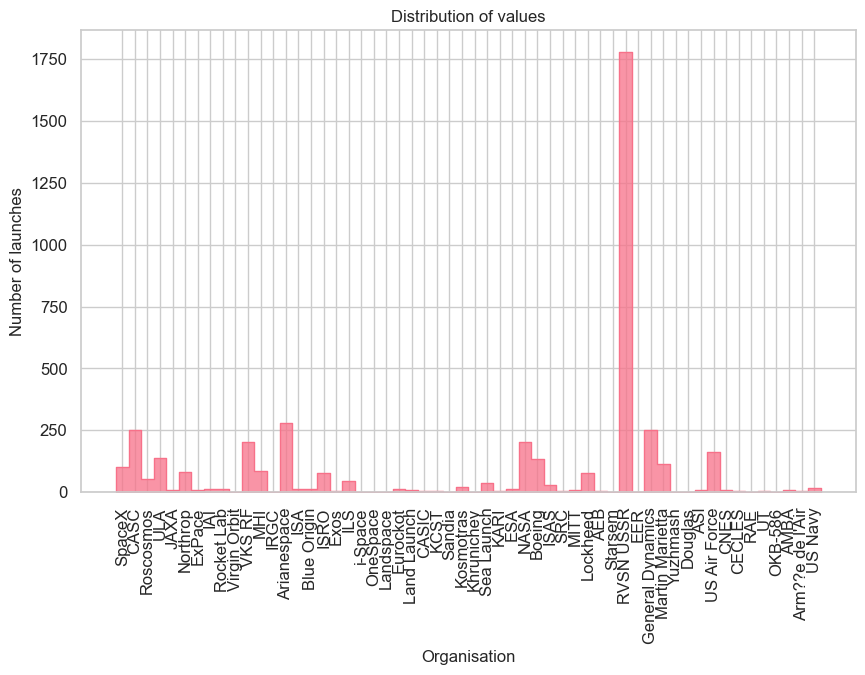

In [147]:
sns.set_style('whitegrid') # set style to white grid
sns.set_palette('husl') # set color palette
plt.figure(figsize=(10, 6))
sns.histplot(x='Organisation', data=df_data, bins=50, element='step', binwidth=10)

# set chart title and axis labels
plt.title('Distribution of values')
plt.xlabel('Organisation')
plt.ylabel('Number of launches')
plt.xticks(rotation=90)
plt.tick_params(axis='x', which='major', pad=5, width=1)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)


# Number of Active versus Retired Rockets

How many rockets are active compared to those that are decomissioned? 

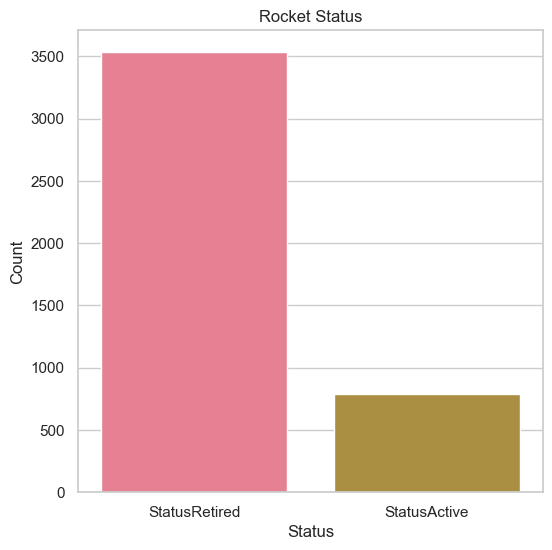

In [148]:
sns.set_style('whitegrid') # set style to white grid
sns.set_palette('husl') # set color palette
plt.figure(figsize=(6, 6))

rocket_status = df_data['Rocket_Status'].value_counts()
sns.barplot(x=rocket_status.index, y=rocket_status.values)
plt.title('Rocket Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



# Distribution of Mission Status

How many missions were successful?
How many missions failed?

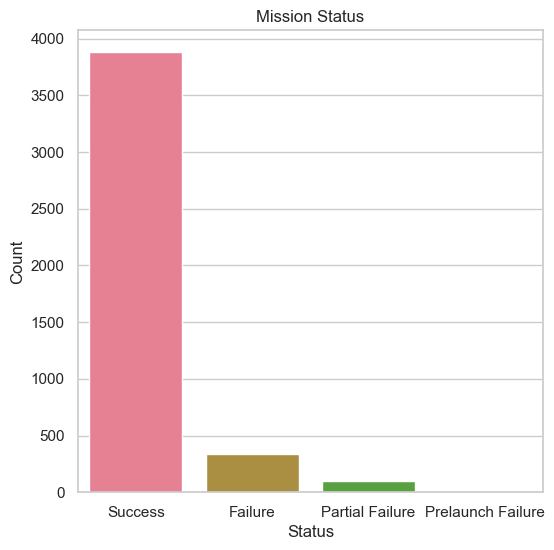

In [149]:
sns.set_style('whitegrid') # set style to white grid
sns.set_palette('husl') # set color palette
plt.figure(figsize=(6, 6))

rocket_status = df_data['Mission_Status'].value_counts()
sns.barplot(x=rocket_status.index, y=rocket_status.values)
plt.title('Mission Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



# How Expensive are the Launches? 

Create a histogram and visualise the distribution. The price column is given in USD millions (careful of missing values). 

C:\Users\mbajd\AppData\Local\Temp\ipykernel_5060\2586388074.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



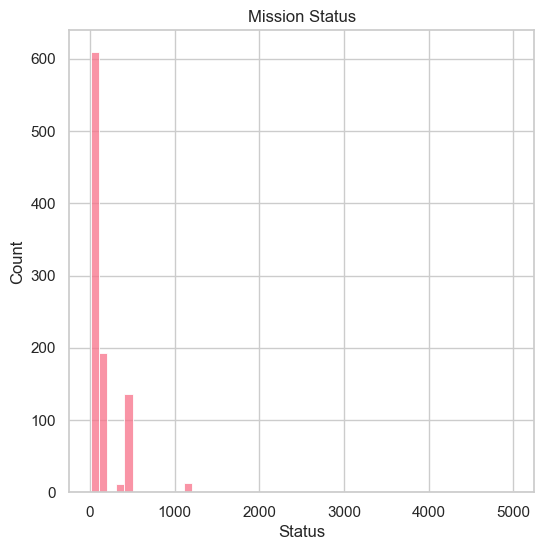

In [150]:
df_data_price = df_data[df_data['Price'] != 0]
df_data_price['Price'] = df_data_price['Price'].str.replace(',', '').astype(float)

sns.set_style('whitegrid') # set style to white grid
sns.set_palette('husl') # set color palette
plt.figure(figsize=(6, 6))

sns.histplot(data=df_data_price.Price, bins=50)
plt.title('Mission Status')
plt.xlabel('Status')
plt.ylabel('Count')
plt.show()



# Use a Choropleth Map to Show the Number of Launches by Country

* Create a choropleth map using [the plotly documentation](https://plotly.com/python/choropleth-maps/)
* Experiment with [plotly's available colours](https://plotly.com/python/builtin-colorscales/). I quite like the sequential colour `matter` on this map. 
* You'll need to extract a `country` feature as well as change the country names that no longer exist.

Wrangle the Country Names

You'll need to use a 3 letter country code for each country. You might have to change some country names.

* Russia is the Russian Federation
* New Mexico should be USA
* Yellow Sea refers to China
* Shahrud Missile Test Site should be Iran
* Pacific Missile Range Facility should be USA
* Barents Sea should be Russian Federation
* Gran Canaria should be USA


You can use the iso3166 package to convert the country names to Alpha3 format.

In [151]:
%pip install --upgrade nbformat


In [152]:
%pip install pycountry

Note: you may need to restart the kernel to use updated packages.


In [153]:
import plotly.graph_objects as go
import iso3166
import pycountry

# Convert country names to Alpha3 format
def convert_to_alpha3(country_name):
    try:
        return pycountry.countries.lookup(country_name).alpha_3
    except LookupError:
        return None
df_data["Country"] = df_data["Location"].str.split(", ").str[-1]
df_data.loc[(df_data["Country"] == 'Russia'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'New Mexico'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Yellow Sea'), "Country"] = "China"
df_data.loc[(df_data["Country"] == 'Shahrud Missile Test Site'), "Country"] = "Iran"
df_data.loc[(df_data["Country"] == 'Pacific Missile Range Facility'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Barents Sea'), "Country"] = "Russian Federation"
df_data.loc[(df_data["Country"] == 'Gran Canaria'), "Country"] = "USA"
df_data.loc[(df_data["Country"] == 'Iran'), "Country"] = "Iran, Islamic Republic of"
df_data.loc[(df_data["Country"] == 'South Korea'), "Country"] = "Korea, Republic of"
df_data.loc[(df_data["Country"] == 'North Korea'), "Country"] = "Korea, Democratic People's Republic of"
df_data.loc[(df_data["Country"] == 'Kazakhstan'), "Country"] = "Russian Federation"

jeden = df_data['Country'].value_counts()
df_data['Country_Code'] = df_data['Country'].apply(convert_to_alpha3)
rocket_location = df_data['Country_Code'].value_counts()

fig = go.Figure(data=go.Choropleth(
    locations=rocket_location.index,  # DataFrame column with country codes or names
    z=rocket_location.values,  # DataFrame column with data to plot
    colorscale='matter',  # Choose a color scale
    autocolorscale=False,
    marker_line_color='white',  # Marker line color
    marker_line_width=0.5,
    colorbar_title='Value',  # Color bar title
))
# Set the map title and projection
fig.update_layout(
    title_text='Number of Mission Failures by Country',
    geo=dict(
        showframe=False,
        projection_type='natural earth'
    )
)
# Set map layout
fig.show()

# Use a Choropleth Map to Show the Number of Failures by Country


In [154]:
failure_counts = df_data.groupby('Country_Code')['Mission_Status'].apply(lambda x: (x == 'Failure').sum()).reset_index(name='Failure_Count')
fig = go.Figure(data=go.Choropleth(
    locations=failure_counts.Country_Code,  # DataFrame column with country codes or names
    z=failure_counts.Failure_Count,  # DataFrame column with data to plot
    colorscale='matter',  # Choose a color scale
    autocolorscale=False,
    marker_line_color='white',  # Marker line color
    marker_line_width=0.5,
    colorbar_title='Value',  # Color bar title
))
# Set the map title and projection
fig.update_layout(
    title_text='Number of Mission Failures by Country',
    geo=dict(
        showframe=False,
        projection_type='natural earth'
    )
)
# Set map layout
fig.show()

In [155]:
# Create the sunburst chart
fig = px.sunburst(df_data, path=['Country', 'Organisation', 'Mission_Status'])

# Show the chart
fig.show()

# Analyse the Total Amount of Money Spent by Organisation on Space Missions

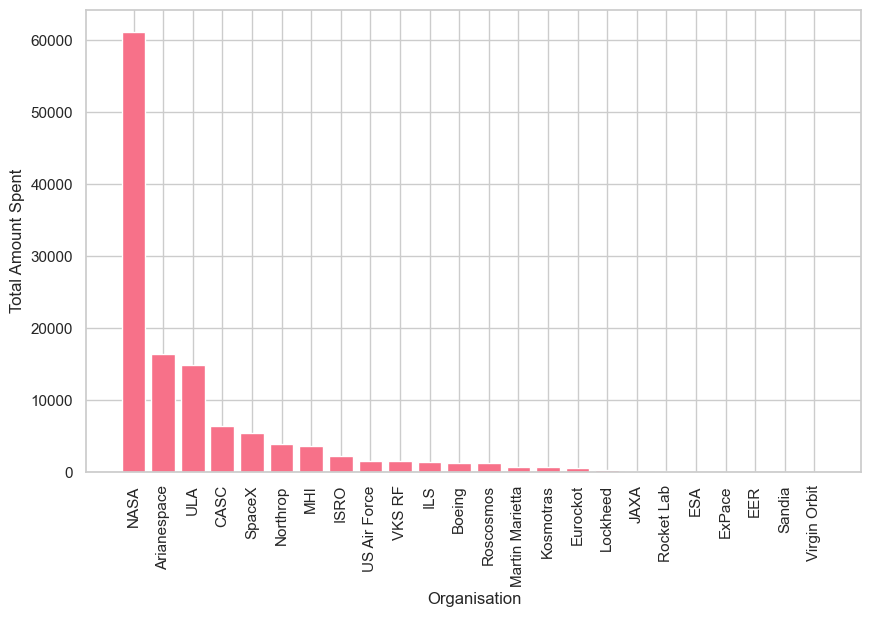

In [156]:
df_data['Price'] = pd.to_numeric(df_data['Price'], errors='coerce')
total_amount = df_data.groupby('Organisation')['Price'].sum().reset_index(name='Total_Amount').sort_values(by='Total_Amount', ascending=False)

total_amount = total_amount[total_amount['Total_Amount'] != 0]

plt.bar(total_amount['Organisation'], total_amount['Total_Amount'])
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Total Amount Spent')
plt.show()

# Analyse the Amount of Money Spent by Organisation per Launch

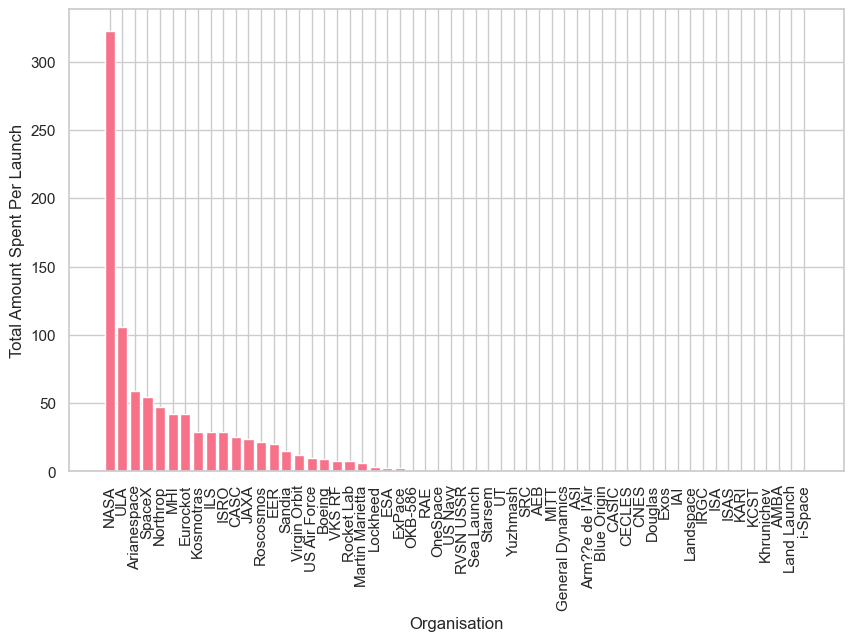

In [157]:
price_per_launch = df_data.groupby('Organisation')['Price'].mean().reset_index(name='Total_Amount').sort_values(by='Total_Amount', ascending=False)
plt.bar(price_per_launch['Organisation'], price_per_launch['Total_Amount'])
plt.xticks(rotation=90)
plt.xlabel('Organisation')
plt.ylabel('Total Amount Spent Per Launch')
plt.show()


# Chart the Number of Launches per Year

In [158]:
df_data.head()

,Unnamed: 0.1,Unnamed: 0,Organisation,Location,Date,Detail,Rocket_Status,Price,Mission_Status,Country,Country_Code
0,0,0,SpaceX,"LC-39A, Kennedy Space Center, Florida, USA","Fri Aug 07, 2020 05:12 UTC",Falcon 9 Block 5 | Starlink V1 L9 & BlackSky,StatusActive,50.00,Success,USA,USA
1,1,1,CASC,"Site 9401 (SLS-2), Jiuquan Satellite Launch Ce...","Thu Aug 06, 2020 04:01 UTC",Long March 2D | Gaofen-9 04 & Q-SAT,StatusActive,29.75,Success,China,CHN
2,2,2,SpaceX,"Pad A, Boca Chica, Texas, USA","Tue Aug 04, 2020 23:57 UTC",Starship Prototype | 150 Meter Hop,StatusActive,0.00,Success,USA,USA
3,3,3,Roscosmos,"Site 200/39, Baikonur Cosmodrome, Kazakhstan","Thu Jul 30, 2020 21:25 UTC",Proton-M/Briz-M | Ekspress-80 & Ekspress-103,StatusActive,65.00,Success,Russian Federation,RUS
4,4,4,ULA,"SLC-41, Cape Canaveral AFS, Florida, USA","Thu Jul 30, 2020 11:50 UTC",Atlas V 541 | Perseverance,StatusActive,145.00,Success,USA,USA


In [159]:
%pip install pytz

Note: you may need to restart the kernel to use updated packages.


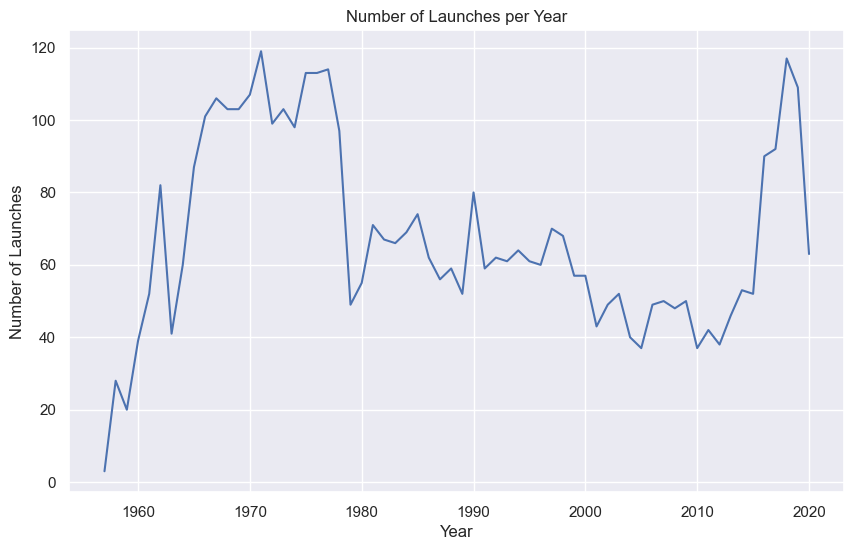

In [160]:
import datetime
import pytz
# Convert the 'Date' column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_convert('Europe/London')
launches_per_year = df_data.groupby(df_data['Date'].dt.year)['Date'].count()

sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(x=launches_per_year.index, y=launches_per_year.values)

plt.title('Number of Launches per Year')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.show()

# Chart the Number of Launches Month-on-Month until the Present

Which month has seen the highest number of launches in all time? Superimpose a rolling average on the month on month time series chart. 

C:\Users\mbajd\AppData\Local\Temp\ipykernel_5060\1402228698.py:1: UserWarning:

Converting to PeriodArray/Index representation will drop timezone information.



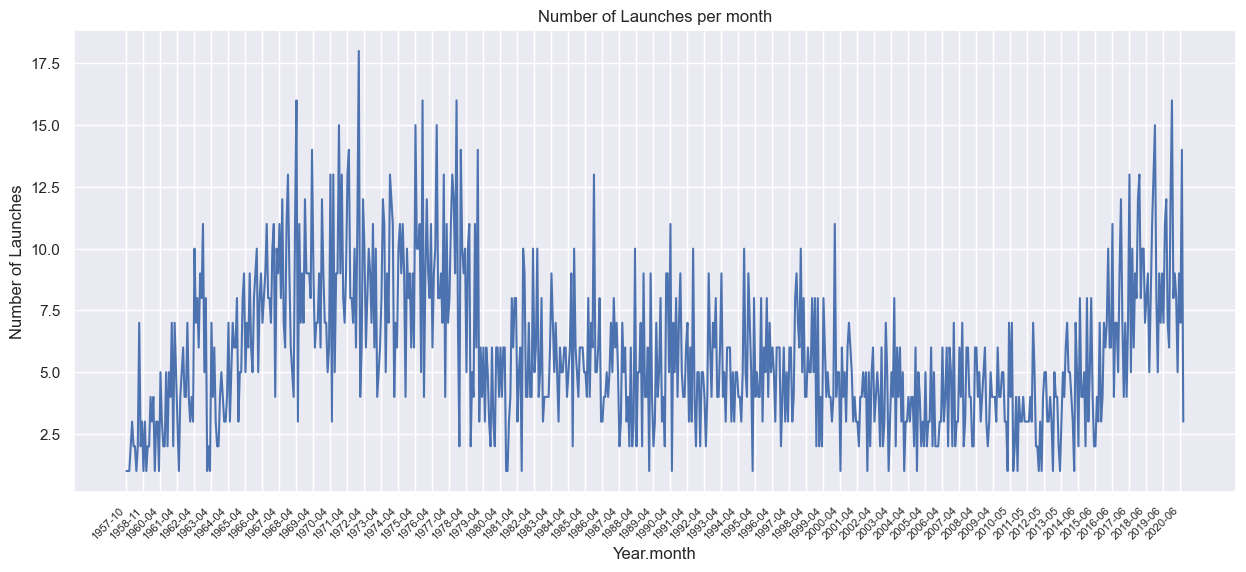

In [161]:

df_data['Year_Month'] = df_data['Date'].dt.to_period('M')

launches_per_month = df_data.groupby([df_data['Year_Month']])['Year_Month'].count()
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(15,6)})

ax = sns.lineplot(x=launches_per_month.index.astype(str), y=launches_per_month.values)
ax.set_xticks(launches_per_month.index.astype(str)[::12])

plt.title('Number of Launches per month')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.xlabel('Year.month')
plt.ylabel('Number of Launches')
plt.show()


# Launches per Month: Which months are most popular and least popular for launches?

Some months have better weather than others. Which time of year seems to be best for space missions?

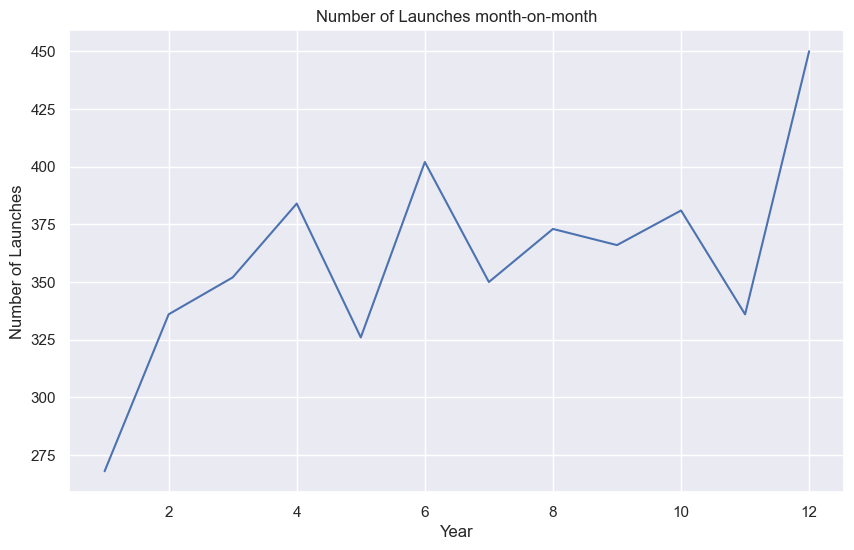

In [162]:
# Convert the 'Date' column to datetime
df_data['Date'] = pd.to_datetime(df_data['Date'], utc=True).dt.tz_convert('Europe/London')
launches_on_month= df_data.groupby(df_data['Date'].dt.month)['Date'].count()

sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(x=launches_on_month.index, y=launches_on_month.values)

plt.title('Number of Launches month-on-month')
plt.xlabel('Year')
plt.ylabel('Number of Launches')
plt.show()

# How has the Launch Price varied Over Time? 

Create a line chart that shows the average price of rocket launches over time. 

In [163]:
# Convert the 'Date' column to datetime
launches_on_month = df_data.groupby(df_data['Date'].dt.year)['Price'].mean()


sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(x=launches_on_month.index, y=launches_on_month.values)

plt.title('Launch price over time')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

# Chart the Number of Launches over Time by the Top 10 Organisations. 

How has the dominance of launches changed over time between the different players? 

    Organisation  Date  Price
12   Arianespace  1984      3
13   Arianespace  1985      4
14   Arianespace  1986      3
15   Arianespace  1987      2
16   Arianespace  1988      6
..           ...   ...    ...
654       VKS RF  2016      4
655       VKS RF  2017      6
656       VKS RF  2018      5
657       VKS RF  2019      8
658       VKS RF  2020      3

[323 rows x 3 columns]


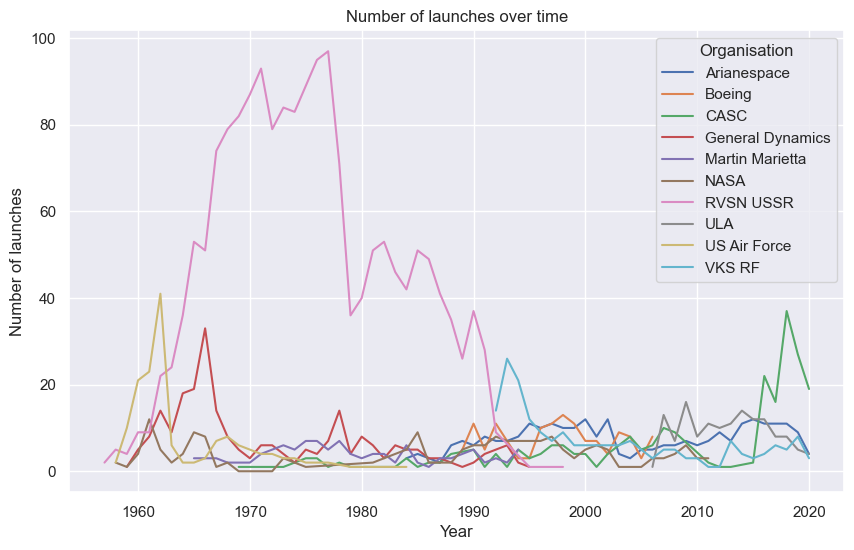

In [ ]:
df_org_year = df_data.groupby(['Organisation', df_data['Date'].dt.year])['Price'].count().reset_index()
# Find top 10 organizations by total number of launches
top_10_org = df_org_year.groupby('Organisation')['Price'].sum().sort_values(ascending=False).head(10).index.tolist()

# Filter dataframe to only include top 10 organizations
df_top_10_org = df_org_year[df_org_year['Organisation'].isin(top_10_org)]


sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(data=df_top_10_org,x=df_top_10_org.Date, y=df_top_10_org.Price, hue='Organisation')

plt.title('Number of launches over time')
plt.xlabel('Year')
plt.ylabel('Number of launches')
plt.show()

# Cold War Space Race: USA vs USSR

The cold war lasted from the start of the dataset up until 1991. 

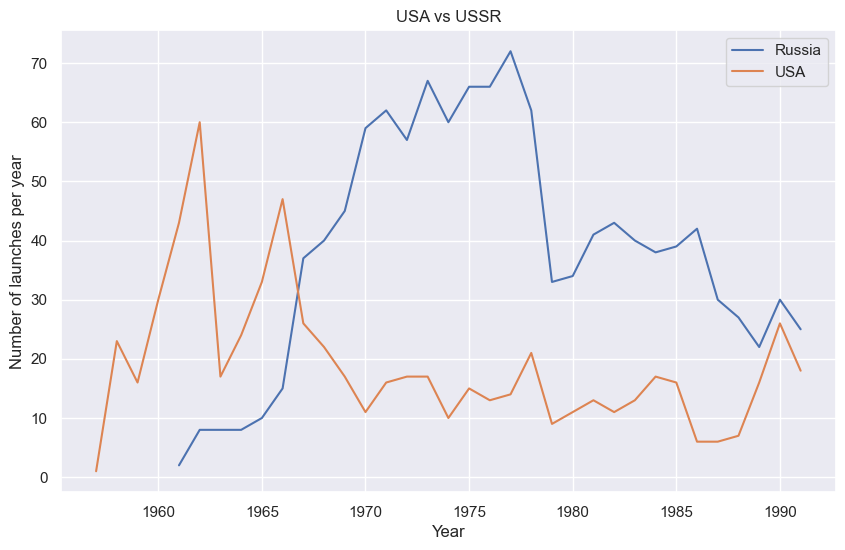

In [ ]:
# Create a new DataFrame containing only data for the USA and USSR during the Cold War era
cold_war_data = df_data[(df_data['Country_Code'] == 'USA') | (df_data['Country_Code'] == 'RUS')]
cold_war_data = cold_war_data[(cold_war_data['Date'] >= '1957-10-04') & (cold_war_data['Date'] < '1991-12-31')]

# Group the data by year and country, and count the number of launches
launches_per_year = cold_war_data.groupby([cold_war_data['Date'].dt.year, 'Country'])['Country'].count().unstack()
sns.set_style('whitegrid')
sns.set_palette('dark')
sns.set(rc={'figure.figsize':(10,6)})

sns.lineplot(data=launches_per_year,x=launches_per_year.index, y=launches_per_year['Russian Federation'],label='Russia')
sns.lineplot(data=launches_per_year,x=launches_per_year.index, y=launches_per_year['USA'],label='USA')


plt.title('USA vs USSR')
plt.xlabel('Year')
plt.ylabel('Number of launches per year')
plt.show()